## CO2 EMISSIONS PREDICATION


 ## PROBLEM

Global energy-related CO2 emissions grew by 1.1% in 2023, increasing 410 million tonnes (Mt) to reach a new record high of 37.4 billion tonnes (Gt). This compares with an increase of 490 Mt in 2022 (1.3%). Emissions from coal accounted for more than 65% of the increase in 2023.

## Task and Approach

The task is to construct a classification model based on available data and evaluate its efficiency. Preparing the dataset for analysis, checking for any correlation, creating a model, and evaluating the performance of the classification model.

## Import the dependencies and understanding the data

pandas , numpy , seaborn and matplotlib.pyplot are imported with aliases pd , np , sns and plt respectively

In [2]:
# Data analysis
import numpy as np
import pandas as pd
# Visualization and Plotting
import matplotlib.pyplot as plt
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('global_sustainable_energy_data.csv')
data

,Country,Year,Elec_Access (%),Clean_Cooking (%),Renewable_Capacity_PerCap,Finance_Flow_Dev_Countries,Renewable_Share (%),Fossil_Elec (TWh),Nuclear_Elec (TWh),Renewable_Elec (TWh),...,Energy_Consumption_PerCap (kWh),Energy_Intensity (MJ/$GDP),CO2_Emissions (kt),Renewables_Primary (%),GDP_Growth (%),GDP_PerCapita ($),Density (P/Km2),Land_Area (Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [4]:
data.head()

,Country,Year,Elec_Access (%),Clean_Cooking (%),Renewable_Capacity_PerCap,Finance_Flow_Dev_Countries,Renewable_Share (%),Fossil_Elec (TWh),Nuclear_Elec (TWh),Renewable_Elec (TWh),...,Energy_Consumption_PerCap (kWh),Energy_Intensity (MJ/$GDP),CO2_Emissions (kt),Renewables_Primary (%),GDP_Growth (%),GDP_PerCapita ($),Density (P/Km2),Land_Area (Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [5]:
# no.of rows and columns
print('We have',data.shape[0],' of data with',data.shape[1], 'columns')

We have 3649  of data with 21 columns


## EDA - Exploratory Data Analysis

In [10]:
# check the descriptive statistics of the data
data.describe(include='all')

,Country,Year,Elec_Access (%),Clean_Cooking (%),Renewable_Capacity_PerCap,Finance_Flow_Dev_Countries,Renewable_Share (%),Fossil_Elec (TWh),Nuclear_Elec (TWh),Renewable_Elec (TWh),...,Energy_Consumption_PerCap (kWh),Energy_Intensity (MJ/$GDP),CO2_Emissions (kt),Renewables_Primary (%),GDP_Growth (%),GDP_PerCapita ($),Density (P/Km2),Land_Area (Km2),Latitude,Longitude
count,3649,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,...,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3648,3.648000e+03,3648.000000,3648.000000
unique,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,124,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN
freq,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN
mean,NaN,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,...,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,NaN,6.332135e+05,18.246388,14.822695
std,NaN,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,...,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,NaN,1.585519e+06,24.159232,66.348148
min,NaN,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,NaN,2.100000e+01,-40.900557,-175.198242
25%,NaN,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,...,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,NaN,2.571300e+04,3.202778,-11.779889
50%,NaN,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,...,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,NaN,1.176000e+05,17.189877,19.145136
75%,NaN,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,...,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,NaN,5.131200e+05,38.969719,46.199616


In [12]:
# checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          3649 non-null   object 
 1   Year                             3649 non-null   int64  
 2   Elec_Access (%)                  3639 non-null   float64
 3   Clean_Cooking (%)                3480 non-null   float64
 4   Renewable_Capacity_PerCap        2718 non-null   float64
 5   Finance_Flow_Dev_Countries       1560 non-null   float64
 6   Renewable_Share (%)              3455 non-null   float64
 7   Fossil_Elec (TWh)                3628 non-null   float64
 8   Nuclear_Elec (TWh)               3523 non-null   float64
 9   Renewable_Elec (TWh)             3628 non-null   float64
 10  LowCarbon_Elec (%)               3607 non-null   float64
 11  Energy_Consumption_PerCap (kWh)  3649 non-null   float64
 12  Energy_Intensity (MJ

## PREPROCESS STEPS

## Removing irrelavent featues

In [17]:
columns_to_drop = ['Year','Country','Latitude','Longitude','Renewables_Primary (%)','Finance_Flow_Dev_Countries','Land_Area (Km2)','Density (P/Km2)','Nuclear_Elec (TWh)',]
data = data.drop(columns=columns_to_drop)
data.head()

,Elec_Access (%),Clean_Cooking (%),Renewable_Capacity_PerCap,Renewable_Share (%),Fossil_Elec (TWh),Renewable_Elec (TWh),LowCarbon_Elec (%),Energy_Consumption_PerCap (kWh),Energy_Intensity (MJ/$GDP),CO2_Emissions (kt),GDP_Growth (%),GDP_PerCapita ($)
0,1.613591,6.2,9.22,44.99,0.16,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN
1,4.074574,7.2,8.86,45.60,0.09,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN
2,9.409158,8.2,8.47,37.83,0.13,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579
3,14.738506,9.5,8.09,36.66,0.31,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814
4,20.064968,10.9,7.75,44.24,0.33,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074


## Handle missing values

In [20]:
data.isnull().sum()

Elec_Access (%)                     10
Clean_Cooking (%)                  169
Renewable_Capacity_PerCap          931
Renewable_Share (%)                194
Fossil_Elec (TWh)                   21
Renewable_Elec (TWh)                21
LowCarbon_Elec (%)                  42
Energy_Consumption_PerCap (kWh)      0
Energy_Intensity (MJ/$GDP)         207
CO2_Emissions (kt)                 428
GDP_Growth (%)                     317
GDP_PerCapita ($)                  282
dtype: int64

In [22]:
# Select numerical columns and fill missing values with the median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

In [24]:
data.isnull().sum()

Elec_Access (%)                    0
Clean_Cooking (%)                  0
Renewable_Capacity_PerCap          0
Renewable_Share (%)                0
Fossil_Elec (TWh)                  0
Renewable_Elec (TWh)               0
LowCarbon_Elec (%)                 0
Energy_Consumption_PerCap (kWh)    0
Energy_Intensity (MJ/$GDP)         0
CO2_Emissions (kt)                 0
GDP_Growth (%)                     0
GDP_PerCapita ($)                  0
dtype: int64

In [26]:
print(data.columns)

Index(['Elec_Access (%)', 'Clean_Cooking (%)', 'Renewable_Capacity_PerCap',
       'Renewable_Share (%)', 'Fossil_Elec (TWh)', 'Renewable_Elec (TWh)',
       'LowCarbon_Elec (%)', 'Energy_Consumption_PerCap (kWh)',
       'Energy_Intensity (MJ/$GDP)', 'CO2_Emissions (kt)', 'GDP_Growth (%)',
       'GDP_PerCapita ($)'],
      dtype='object')


In [28]:
from sklearn.preprocessing import StandardScaler
numeric_cols = data.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data.head()

,Elec_Access (%),Clean_Cooking (%),Renewable_Capacity_PerCap,Renewable_Share (%),Fossil_Elec (TWh),Renewable_Elec (TWh),LowCarbon_Elec (%),Energy_Consumption_PerCap (kWh),Energy_Intensity (MJ/$GDP),CO2_Emissions (kt),GDP_Growth (%),GDP_PerCapita ($)
0,-2.558056,-1.511702,-0.390724,0.440606,-0.201180,-0.225954,0.857399,-0.731738,-1.050154,-0.194394,0.019872,-0.421154
1,-2.476693,-1.485628,-0.392410,0.461525,-0.201382,-0.224129,1.407966,-0.733627,-1.021065,-0.194436,0.019872,-0.421154
2,-2.300326,-1.459554,-0.394236,0.195069,-0.201266,-0.223553,1.302873,-0.734376,-1.119966,-0.194024,0.019872,-0.651813
3,-2.124131,-1.425657,-0.396015,0.154946,-0.200748,-0.222881,0.888574,-0.733826,-1.119966,-0.193763,0.990248,-0.651223
4,-1.948032,-1.389153,-0.397607,0.414886,-0.200690,-0.223553,0.768431,-0.734567,-1.178143,-0.194024,-0.375045,-0.650138


## Primary energy consumption   vs CO2 Emissions

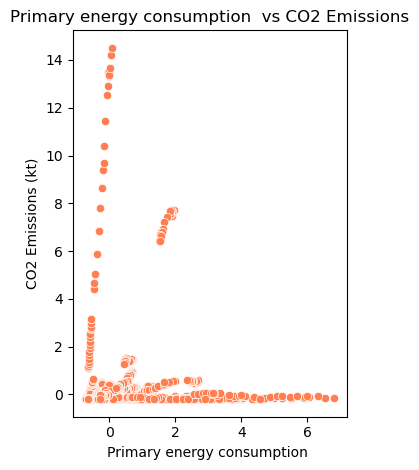

In [30]:
#  Scatter Plot of Renewable_Elec (TWh)  vs CO2 Emissions
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['Energy_Consumption_PerCap (kWh)'],
                y=data['CO2_Emissions (kt)'], color='coral')
plt.title('Primary energy consumption  vs CO2 Emissions')
plt.xlabel('Primary energy consumption ')
plt.ylabel('CO2 Emissions (kt)')

plt.tight_layout()
plt.show()

## Fossil Electricity  vs CO2 Emissions

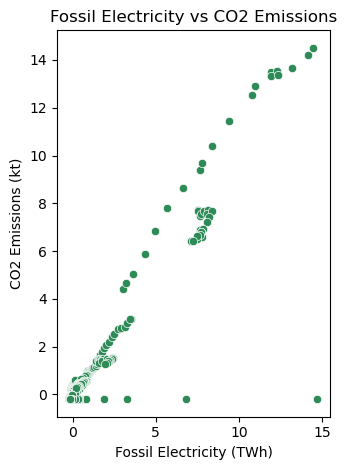

In [32]:
#  Scatter Plot of Fossil_Elec (TWh) vs CO2 Emissions
plt.subplot(1, 2, 2)
sns.scatterplot(x=data['Fossil_Elec (TWh)'],
                y=data['CO2_Emissions (kt)'], color='seagreen')
plt.title('Fossil Electricity vs CO2 Emissions')
plt.xlabel('Fossil Electricity (TWh)')
plt.ylabel('CO2 Emissions (kt)')

plt.tight_layout()
plt.show()

In [34]:
data.corr()

,Elec_Access (%),Clean_Cooking (%),Renewable_Capacity_PerCap,Renewable_Share (%),Fossil_Elec (TWh),Renewable_Elec (TWh),LowCarbon_Elec (%),Energy_Consumption_PerCap (kWh),Energy_Intensity (MJ/$GDP),CO2_Emissions (kt),GDP_Growth (%),GDP_PerCapita ($)
Elec_Access (%),1.000000,0.861156,0.176097,-0.765400,0.122763,0.136666,-0.154166,0.453115,-0.244566,0.115784,-0.107919,0.398417
Clean_Cooking (%),0.861156,1.000000,0.116425,-0.773540,0.096363,0.118688,-0.132598,0.553058,-0.188434,0.080797,-0.127549,0.487730
Renewable_Capacity_PerCap,0.176097,0.116425,1.000000,0.088208,0.024471,0.108077,0.343069,-0.058250,-0.036066,0.019933,0.009020,-0.082585
Renewable_Share (%),-0.765400,-0.773540,0.088208,1.000000,-0.127849,-0.063806,0.446589,-0.418071,0.251264,-0.117424,0.086826,-0.332503
Fossil_Elec (TWh),0.122763,0.096363,0.024471,-0.127849,1.000000,0.845103,-0.063139,0.106177,0.030231,0.948371,0.020780,0.112997
Renewable_Elec (TWh),0.136666,0.118688,0.108077,-0.063806,0.845103,1.000000,0.092058,0.120474,0.007670,0.785686,-0.002662,0.146034
LowCarbon_Elec (%),-0.154166,-0.132598,0.343069,0.446589,-0.063139,0.092058,1.000000,-0.118753,0.048686,-0.046170,-0.013901,0.014608
Energy_Consumption_PerCap (kWh),0.453115,0.553058,-0.058250,-0.418071,0.106177,0.120474,-0.118753,1.000000,0.134205,0.096291,-0.035077,0.662806
Energy_Intensity (MJ/$GDP),-0.244566,-0.188434,-0.036066,0.251264,0.030231,0.007670,0.048686,0.134205,1.000000,0.049326,0.089361,-0.167629
CO2_Emissions (kt),0.115784,0.080797,0.019933,-0.117424,0.948371,0.785686,-0.046170,0.096291,0.049326,1.000000,0.042056,0.095284


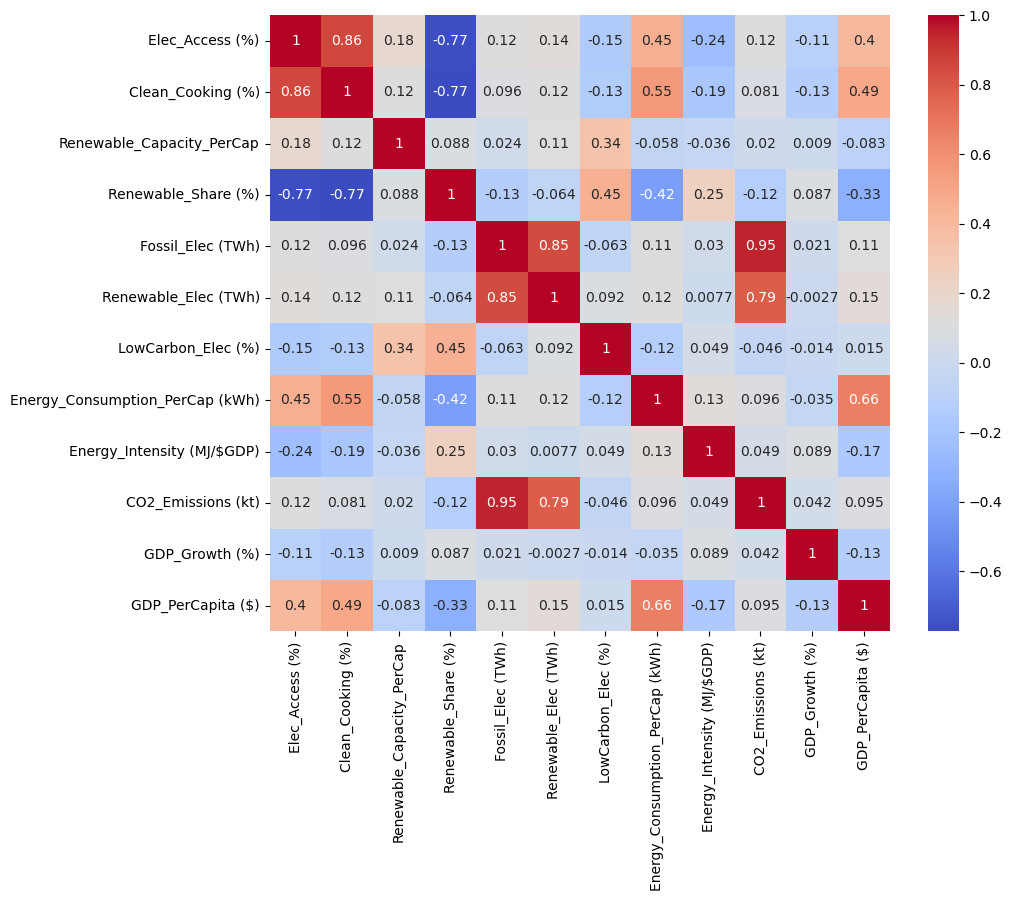

In [35]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Data Partition

In [41]:
from sklearn.model_selection import train_test_split
x= data.drop(columns=['CO2_Emissions (kt)'])
y = data['CO2_Emissions (kt)']

In [43]:
x

,Elec_Access (%),Clean_Cooking (%),Renewable_Capacity_PerCap,Renewable_Share (%),Fossil_Elec (TWh),Renewable_Elec (TWh),LowCarbon_Elec (%),Energy_Consumption_PerCap (kWh),Energy_Intensity (MJ/$GDP),GDP_Growth (%),GDP_PerCapita ($)
0,-2.558056,-1.511702,-0.390724,0.440606,-0.201180,-0.225954,0.857399,-0.731738,-1.050154,0.019872,-0.421154
1,-2.476693,-1.485628,-0.392410,0.461525,-0.201382,-0.224129,1.407966,-0.733627,-1.021065,0.019872,-0.421154
2,-2.300326,-1.459554,-0.394236,0.195069,-0.201266,-0.223553,1.302873,-0.734376,-1.119966,0.019872,-0.651813
3,-2.124131,-1.425657,-0.396015,0.154946,-0.200748,-0.222881,0.888574,-0.733826,-1.119966,0.990248,-0.651223
4,-1.948032,-1.389153,-0.397607,0.414886,-0.200690,-0.223553,0.768431,-0.734567,-1.178143,-0.375045,-0.650138
...,...,...,...,...,...,...,...,...,...,...,...
3644,-1.204261,-0.896349,-0.139476,1.706359,-0.191556,-0.197048,0.351117,-0.647607,1.381646,-0.496194,-0.584430
3645,-1.150805,-0.896349,-0.142051,1.725563,-0.192852,-0.187637,0.638969,-0.652200,1.239112,0.231460,-0.596458
3646,-1.104717,-0.893741,-0.047470,1.649089,-0.190893,-0.176497,0.665606,-0.641443,1.332195,0.252573,-0.595438
3647,-1.064752,-0.888526,-0.052761,1.692641,-0.191094,-0.184948,0.553376,-0.654051,1.518362,-1.766140,-0.592182


In [45]:
y

0      -0.194394
1      -0.194436
2      -0.194024
3      -0.193763
4      -0.194024
          ...   
3644   -0.180308
3645   -0.181241
3646   -0.178441
3647   -0.179292
3648   -0.181022
Name: CO2_Emissions (kt), Length: 3649, dtype: float64

## Train Test Split

In [48]:
# Train-test split (80% for training, 20% for testing)
#random_state is the seed used by the random number generator. It can be any integer.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state =1) 

## Important features

In [51]:
# Applying Mutual info classifier to get Important Features
from sklearn.feature_selection import mutual_info_regression

# Measure of how much information the presence of one variable gives about the other variable.
mutual_info = mutual_info_regression(x_train, y_train)
print(mutual_info)

[0.34306901 0.55646083 0.52961529 0.66644851 1.60306856 0.70393534
 0.53472043 0.72136171 0.27378876 0.18299118 0.45626933]


In [52]:
#convert array to series
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

Fossil_Elec (TWh)                  1.603069
Energy_Consumption_PerCap (kWh)    0.721362
Renewable_Elec (TWh)               0.703935
Renewable_Share (%)                0.666449
Clean_Cooking (%)                  0.556461
LowCarbon_Elec (%)                 0.534720
Renewable_Capacity_PerCap          0.529615
GDP_PerCapita ($)                  0.456269
Elec_Access (%)                    0.343069
Energy_Intensity (MJ/$GDP)         0.273789
GDP_Growth (%)                     0.182991
dtype: float64

<Axes: >

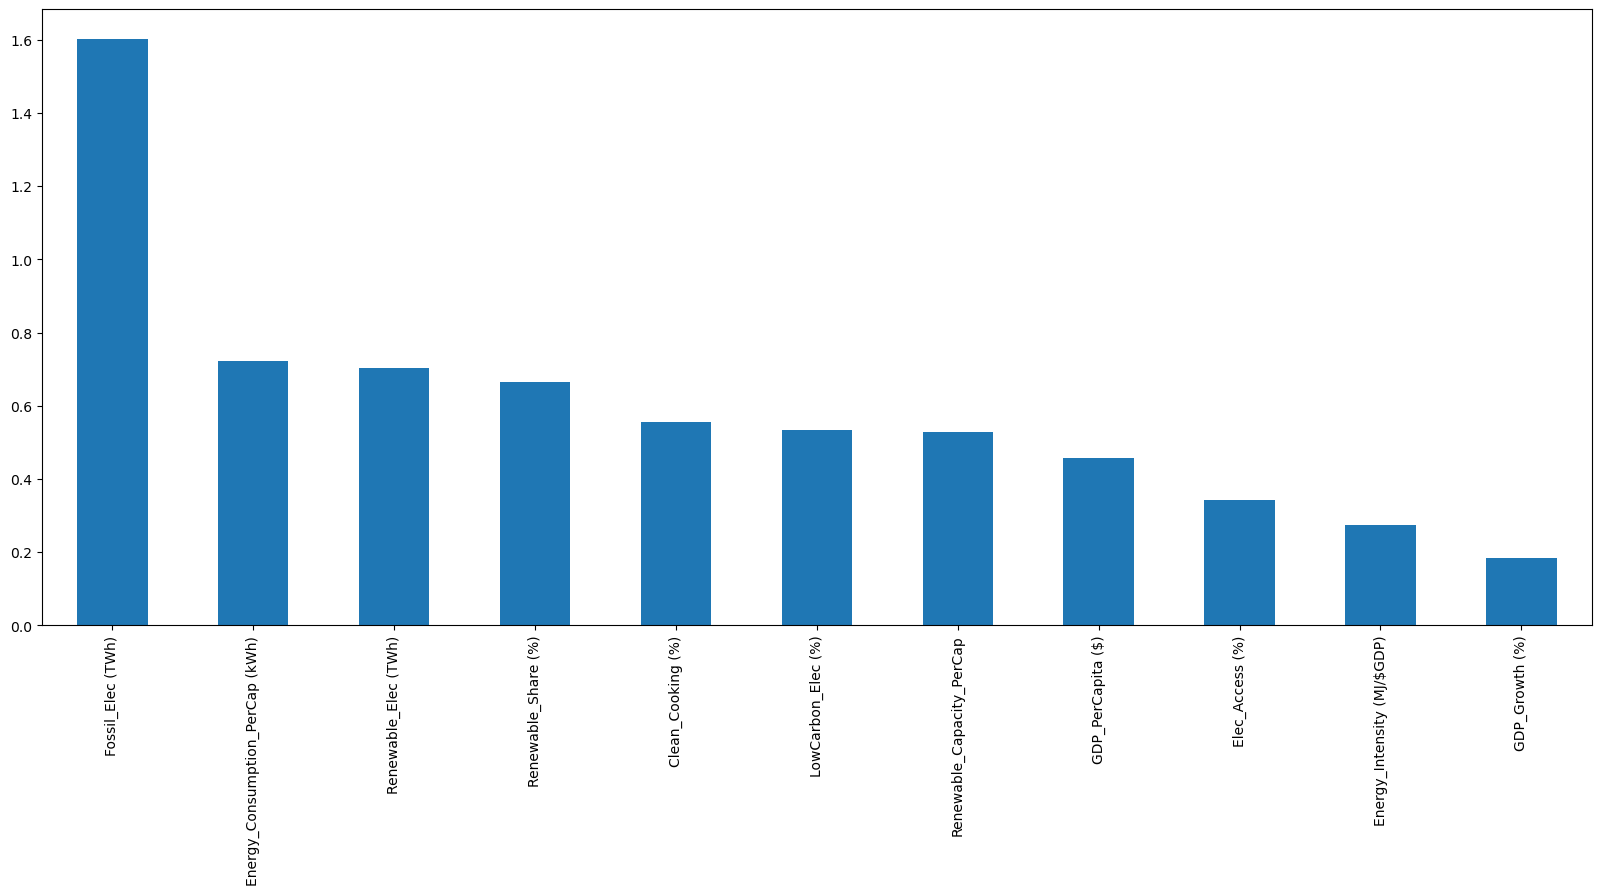

In [55]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

## Model Training

We will apply the following models:

1.Linear Regression

2.Random Forest Regressor

3.Decision Tree Regressor

4.Gradient Boosting Regressor

5.XGBoost Regressor

6.AdaBoostRegressor

7.KNeighborsRegressor

## 1.Linear Regression:

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [64]:
model = LinearRegression()

In [66]:
model.fit(x_train, y_train)

LinearRegression()

In [68]:
print('LinearRegression:')
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
print(cross_val_score(model,x,y,cv=5,).mean())

LinearRegression:
0.8840267601965517
0.9412261675498771
0.8125619030076232


## 2.Random Forest Regressor:

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [81]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [82]:
y_pred_train1=model.predict(x_train)
y_pred_test1=model.predict(x_test)

In [83]:
print('RandomForestRegressor:')
print(r2_score(y_train,y_pred_train1))
print(r2_score(y_test,y_pred_test1))
print(cross_val_score(model,x,y,cv=5,).mean())

RandomForestRegressor:
0.9815073341474541
0.9804005264887498
0.6286147427375208


## 3.Decision Tree Regressor

In [86]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [87]:
model = DecisionTreeRegressor()

In [88]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [89]:
y_pred_train2=model.predict(x_train)
y_pred_test2=model.predict(x_test)

In [90]:
print('DecisionTreeRegressor:')
print(r2_score(y_train,y_pred_train2))
print(r2_score(y_test,y_pred_test2))
print(cross_val_score(model,x,y,cv=5,).mean())

DecisionTreeRegressor:
1.0
0.9808097953245426
-0.041637813769793405


In [520]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_4 <= 0.25
|   |--- feature_4 <= 0.07
|   |   |--- feature_4 <= 0.01
|   |   |   |--- feature_4 <= 0.00
|   |   |   |   |--- feature_4 <= 0.00
|   |   |   |   |   |--- feature_5 <= 0.01
|   |   |   |   |   |   |--- feature_4 <= 0.00
|   |   |   |   |   |   |   |--- feature_5 <= 0.00
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.13
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 0.13
|   |   |   |   |   |   |   |   |   |   |--- feature_4 <= 0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  0.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |--- feature_8 >  0.13
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.26
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.26
|   |   |   |   |   |   |   |   |   |   |   |-

[Text(0.9351528539826556, 0.9821428571428571, 'Fossil_Elec (TWh) <= 0.252\nsquared_error = 0.005\nsamples = 2554\nvalue = 0.014'),
 Text(0.8789429311785191, 0.9464285714285714, 'Fossil_Elec (TWh) <= 0.067\nsquared_error = 0.0\nsamples = 2524\nvalue = 0.007'),
 Text(0.7801763359290128, 0.9107142857142857, 'Fossil_Elec (TWh) <= 0.011\nsquared_error = 0.0\nsamples = 2479\nvalue = 0.005'),
 Text(0.6596220620217842, 0.875, 'Fossil_Elec (TWh) <= 0.004\nsquared_error = 0.0\nsamples = 2134\nvalue = 0.002'),
 Text(0.5285499574698066, 0.8392857142857143, 'Fossil_Elec (TWh) <= 0.001\nsquared_error = 0.0\nsamples = 1807\nvalue = 0.001'),
 Text(0.449611530848064, 0.8035714285714286, 'Renewable_Elec (TWh) <= 0.012\nsquared_error = 0.0\nsamples = 1503\nvalue = 0.001'),
 Text(0.3509622416963962, 0.7678571428571429, 'Fossil_Elec (TWh) <= 0.0\nsquared_error = 0.0\nsamples = 1445\nvalue = 0.001'),
 Text(0.24605278102828557, 0.7321428571428571, 'Renewable_Elec (TWh) <= 0.001\nsquared_error = 0.0\nsamples 

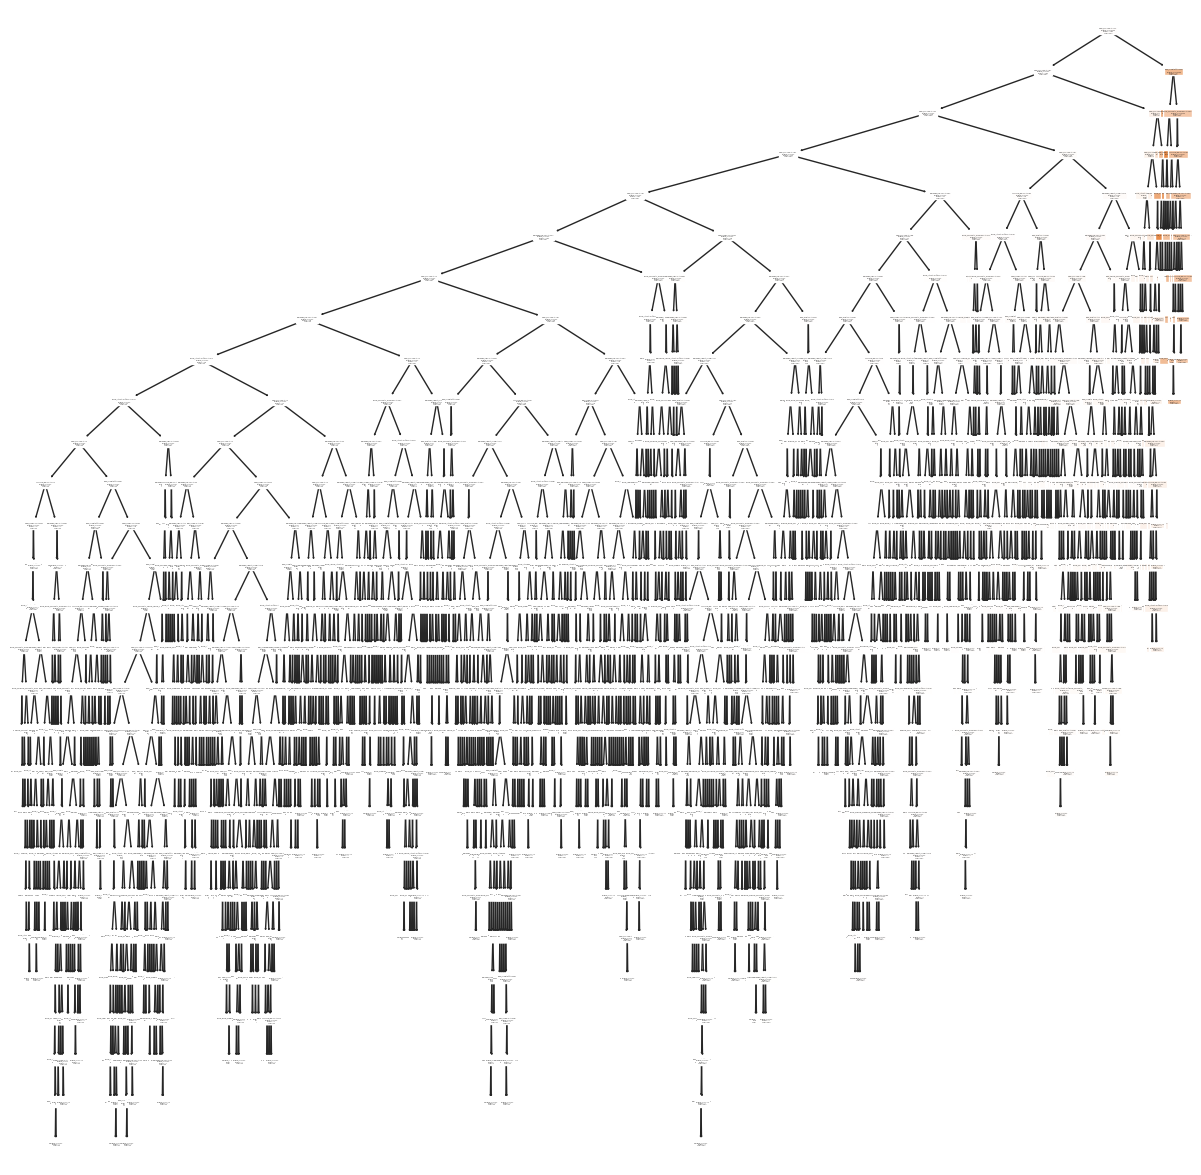

In [522]:
fig=plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=x.columns.tolist(),class_names=['CO2_Emissions (kt)'],filled=True)

## 4.Gradient Boosting Regressor

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [100]:
y_pred_train3=model.predict(x_train)
y_pred_test3=model.predict(x_test)

In [103]:
print('GradientBoostingRegressor:')
print(r2_score(y_train,y_pred_train3))
print(r2_score(y_test,y_pred_test3))
print(cross_val_score(model,x,y,cv=5,).mean())

GradientBoostingRegressor:
0.9990573983384693
0.9896635071663404
0.6988627998169546


## 5.XGBoost Regressor:

In [62]:
from xgboost import XGBRegressor

In [78]:
model=XGBRegressor(learning_rate= 0.05, max_depth= 5, n_estimators=100, subsample=1.0)
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [80]:
y_pred_train4=model.predict(x_train)
y_pred_test4=model.predict(x_test)

In [82]:
print('XGBRegressor:')
print(r2_score(y_train,y_pred_train4))
print(r2_score(y_test,y_pred_test4))
print(cross_val_score(model,x,y,cv=5,).mean())

XGBRegressor:
0.9990271890425672
0.9831113038590078
0.47244518171336686


## 6.AdaBoostRegressor

In [113]:
from sklearn.ensemble import AdaBoostRegressor

In [116]:
model=AdaBoostRegressor()
model.fit(x_train,y_train)

AdaBoostRegressor()

In [118]:
y_pred_train5=model.predict(x_train)
y_pred_test5=model.predict(x_test)

In [120]:
print('AdaBoostRegressor:')
print(r2_score(y_train,y_pred_train4))
print(r2_score(y_test,y_pred_test4))
print(cross_val_score(model,x,y,cv=5,).mean())

AdaBoostRegressor:
0.9999964601568673
0.9804875405898031
0.3703789569006698


## 7.KNeighbors Regressor

In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [125]:
model=KNeighborsRegressor(n_neighbors=10)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [127]:
y_pred_train6 = model.predict(x_train)
y_pred_test6 = model.predict(x_test)

In [129]:
print('KNeighborsRegressor:')
print(r2_score(y_train,y_pred_train6))
print(r2_score(y_test,y_pred_test6))
print(cross_val_score(model,x,y,cv=5,).mean())

KNeighborsRegressor:
0.900814964422328
0.9426086888643053
0.6710792181889115


### LinearRegression is better model

## User Input Prediction

In [395]:
import joblib

x = int(input('''DO YOU WANT PREDICT C02 EMISSION !!!
'0.No'
'1.Yes'
'''))

if x == 0:
    print('Thank you!')
elif x == 1:
    Elec_Access  = int(input('Enter the Access to electricity (% of population):'))
    Clean_Cooking  = int(input('Enter clean fuels for cooking: '))
    Renewable_Capacity_PerCap = float(input('Enter Renewable-electricity: '))
    Renewable_Share = int(input('Renewable energy share in the total final energy consumption: '))
    Fossil_Elec  = int(input('Electricity from fossil fuels (TWh)'))
    Renewable_Elec  = int(input('Electricity from renewables (TWh):'))
    LowCarbon_Elec = int(input('Low-carbon electricity:'))
    Energy_Consumption_PerCap  = int(input('Primary energy consumption per capita (kWh/person) '))
    Energy_Intensity= float(input('Energy intensity level of primary energy : '))
    GDP_Growth  = int(input('gdp_growth: '))
    GDP_PerCapita = int(input('gdp_per_capita:'))
    
    # Prepare input data for prediction
    prediction_data = [Elec_Access,Clean_Cooking,Renewable_Capacity_PerCap,Renewable_Share,Fossil_Elec,Renewable_Elec,LowCarbon_Elec,
    Energy_Consumption_PerCap,Energy_Intensity,GDP_Growth,GDP_PerCapita]

    # Print a separator for clarity
    print('--------------------------------------')

    # Make the prediction using the trained model
    predict_emissions = model.predict([prediction_data])[0]
    
    # Output the predicted insurance charges
    print(f'The predicted CO2 EMISSION is: {predict_emissions:.2f}')

else:
    print('Input is invalid!')

DO YOU WANT PREDICT C02 EMISSION !!!
'0.No'
'1.Yes'
 1
Enter the Access to electricity (% of population): 456
Enter clean fuels for cooking:  686
Enter Renewable-electricity:  34354
Renewable energy share in the total final energy consumption:  766
Electricity from fossil fuels (TWh) 35435
Electricity from renewables (TWh): 6786
Low-carbon electricity: 354
Primary energy consumption per capita (kWh/person)  55767
Energy intensity level of primary energy :  4655
gdp_growth:  567
gdp_per_capita: 546


--------------------------------------
The predicted CO2 EMISSION is: 10.53


## FINISHED